<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

#### Load the csv file

In [2]:
df=pd.read_csv('Heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df['CVD'].value_counts()

0    3596
1     644
Name: CVD, dtype: int64

In [4]:
df.shape

(4240, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [6]:
df=df.fillna(method='ffill')
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

In [7]:
y=df['CVD']
x=df[['diaBP','sysBP','BPMeds']]
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.404151
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            3
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                 0.05122
Time:                        22:04:57   Log-Likelihood:                -1713.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.314e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6017      0.305    -15.085      0.000      -5.200      -4.004
diaBP         -0.0108      0.005     -1.987      0.047      -0.021      -0.000
sysBP          0.0277      0.003      9.572      0.000       0.022       0.033
BPMeds         0.3113      0.212      1.471      0.141      -0.103       0.726
==============================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [9]:
y=df['CVD']
x=df[['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']]
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.406427
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                 0.04587
Time:                        22:05:07   Log-Likelihood:                -1723.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.002e-34
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2706      0.079    -28.729      0.000      -2.425      -2.116
currentSmoker       0.2545      0.089      2.872      0.004       0.081       0.428
BPMeds              0.3848      0.207      1.861      0.063      -0.020       0.790
prevalentStroke     1.0765      0.422      2.548      0.011       0.248       1.905
prevalentHyp        0.9298      0.092     10.156      0.000       0.750       1.109
diabetes            1.0642      0.210      5.058      0.000       0.652       1.477
===================================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
y=df['CVD']
x=df['prevalentHyp']
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.411192
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                 0.03469
Time:                        22:05:13   Log-Likelihood:                -1743.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 4.370e-29
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.0996      0.059    -35.395      0.000      -2.216      -1.983
prevalentHyp     0.9837      0.087     11.281      0.000       0.813       1.155
================================================================================
"""

In [11]:
#odds ratio
y_pred=model.predict(xc)
y_pred.head()

0    0.109134
1    0.109134
2    0.109134
3    0.246773
4    0.109134
dtype: float64

In [12]:
df_BP  = pd.concat(objs=(df['CVD'] ,y_pred ) , axis=1 )
df_BP = df_BP.rename(columns={'CVD':'CVD',0: 'Predicted_Prob'})
df_BP['Odds Ratio'] = y_pred/(1-y_pred)
df_BP.head()

,CVD,Predicted_Prob,Odds Ratio
0,0,0.109134,0.122504
1,0,0.109134,0.122504
2,0,0.109134,0.122504
3,1,0.246773,0.327621
4,0,0.109134,0.122504


<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
y=df['CVD']
x=df.drop('CVD',axis=1)
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.1107
Time:                        22:05:28   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [14]:
cols = ['const','male','age','cigsPerDay','prevalentStroke','sysBP','glucose']
model_11 = sm.Logit(y,xc.loc[:,cols]).fit()
model_11.summary()

Optimization terminated successfully.
         Current function value: 0.379946
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.1080
Time:                        22:05:46   Log-Likelihood:                -1611.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.457e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4018      0.387    -21.723      0.000      -9.160      -7.644
male                0.4911      0.097      5.057      0.000       0.301       0.681
age                 0.0646      0.006     10.922      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0512      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.576      0.000       0.013       0.021
glucose             0.0068      0.002      4.370      0.000       0.004       0.010
===================================================================================
"""

In [15]:
prob= model_11.predict(xc.loc[:,cols])
prob=pd.DataFrame(prob,columns=['prob'])
prob['chd']=y
prob['y_est']=prob['prob'].apply(lambda x:0 if x<0.5 else 1)
prob

,prob,chd,y_est
0,0.045124,0,0
1,0.055181,0,0
2,0.151048,0,0
3,0.364153,1,0
4,0.105343,0,0
...,...,...,...
4235,0.114107,0,0
4236,0.076506,0,0
4237,0.116199,0,0
4238,0.081596,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
y=df['CVD']
x=df.drop('CVD',axis=1)

xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.1107
Time:                        22:13:22   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [ ]:
# Significant variables are the varibles which have p-value less than 0.05. Performing backward elimination technique
# on the model to find the significant variables.

In [21]:
cols=list(xc.columns)
while len(cols)>0:
    x1=xc[cols]
    mod=sm.Logit(y,x1).fit()
    p=mod.pvalues
    p=p.drop('const')
    pmax=max(p)
    features=p.idxmax()
    if pmax>0.05:
        cols.remove(features)
    else:
        break
selected_Features=cols
print(selected_Features)

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378893
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379946
  

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
y=df['CVD']
x=df.drop('CVD',axis=1)

xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.1107
Time:                        22:19:03   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [23]:
a=pd.DataFrame(model.params,columns=['coefs'])
a['exp_Coefs']=np.exp(model.params)
a

,coefs,exp_Coefs
const,-7.974931,0.000344
male,0.509408,1.664306
age,0.061951,1.063910
education,-0.015644,0.984478
currentSmoker,0.013876,1.013973
cigsPerDay,0.020872,1.021092
BPMeds,0.231086,1.259968
prevalentStroke,0.970648,2.639655
prevalentHyp,0.234604,1.264408
diabetes,0.305457,1.357245


- Odds of CVD for males are higher than that of females by 63.06%.
- odds(CVD) will increase by 6.71% for 1 unit increase in age.
- If cigsperDay increases by 1 unit, then the odds(CVD) will increase by 2.1%
- Odds of CVD for patients with heartstroke are higher than that of patients without heart-stroke by 63.06%.
- If glucose increases by 1 unit, then the odds(CVD) will increase by 0.62%
- If sysBP increases by 1 unit, then the odds(CVD) will increase by 1.7%

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
y=df['CVD']
x=df.drop('CVD',axis=1)

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x,y)

y_pred=lr.predict(x)
confusion_matrix(y,y_pred)

array([[3582,   14],
       [ 624,   20]], dtype=int64)

In [26]:
y=df['CVD']
x=df.drop('CVD',axis=1)
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.1107
Time:                        22:24:59   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [27]:
y_prob=model.predict(xc)
y_pred=y_prob.apply(lambda x:0 if x<0.5 else 1 )
print(y_pred)

0       0
1       0
2       0
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Length: 4240, dtype: int64


In [28]:
confusion_matrix(y,y_pred)

array([[3576,   20],
       [ 591,   53]], dtype=int64)

In [29]:
TP=53
TN=3575
FP=20
FN=591

accuracy=(TN+TP)/(TP+TN+FP+FN)
print("The accuracy of the model is : ",accuracy)

The accuracy of the model is :  0.85586223165841


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
y=df['CVD']
x=df.drop('CVD',axis=1)

from sklearn.metrics import cohen_kappa_score
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
model.summary()
y_prob=model.predict(xc)
y_pred=y_prob.apply(lambda x:0 if x<0.18 else 1)
print("kappa score for the full model is:",cohen_kappa_score(y,y_pred))


Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
kappa score for the full model is: 0.24674273591788942


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
y=df['CVD']
x=df.drop('CVD',axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
vif=[VIF(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vif,index=xc.columns,columns=['vif'])

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


,vif
const,195.577022
male,1.196376
age,1.372623
education,1.052969
currentSmoker,2.495886
cigsPerDay,2.622972
BPMeds,1.099504
prevalentStroke,1.018958
prevalentHyp,2.052190
diabetes,1.509896


In [33]:
# None of the variable vif values are greater than 10. Hence there are no variables with multi-collinearity.

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
y=df['CVD']
x=df.drop('CVD',axis=1)
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
best = pd.DataFrame(model.pvalues,columns=['pvalue']).sort_values(by=['pvalue'])
best.head(6)

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


,pvalue
const,9.793684e-34
age,2.017409e-23
male,3.854008e-07
sysBP,6.032297e-05
cigsPerDay,2.323195e-04
glucose,5.209250e-03


In [37]:
# age, male, sysBP, cigsPerDay, glucose are highly significant varibales compared to other variables. 
# So, these 5 variables mostly effected the prediction of target variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
from sklearn.metrics import accuracy_score,classification_report
y=df['CVD']
x=df[['age','male','sysBP','cigsPerDay','glucose']]
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
y_prob=model.predict(xc)
y_pred=y_prob.apply(lambda x:0 if x<0.5 else 1)

print(classification_report(y,y_pred))
print('accuracy score: ', accuracy_score(y,y_pred))
print('f1_score is: ', 0.12)


Optimization terminated successfully.
         Current function value: 0.380597
         Iterations 7
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3596
           1       0.65      0.07      0.12       644

    accuracy                           0.85      4240
   macro avg       0.75      0.53      0.52      4240
weighted avg       0.82      0.85      0.80      4240

accuracy score:  0.8528301886792453
f1_score is:  0.12


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# model 1
y1=df['CVD']
x1=df.drop('CVD',axis=1)

import statsmodels.api as sm
Xc1=sm.add_constant(x1)
model1= sm.Logit(y1,Xc1).fit()
y_prob1 = model1.predict(Xc1)
y_pred1 = y_prob1.apply(lambda x: 0 if x<0.5 else 1)

# model 2
y2=df['CVD']
x2=df[['age','male','sysBP','cigsPerDay','glucose']]
xc1=sm.add_constant(x2)
model=sm.Logit(y2,xc1).fit()
y_prob2=model.predict(xc1)
y_pred2=y_prob.apply(lambda x:0 if x<0.5 else 1)


Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380597
         Iterations 7


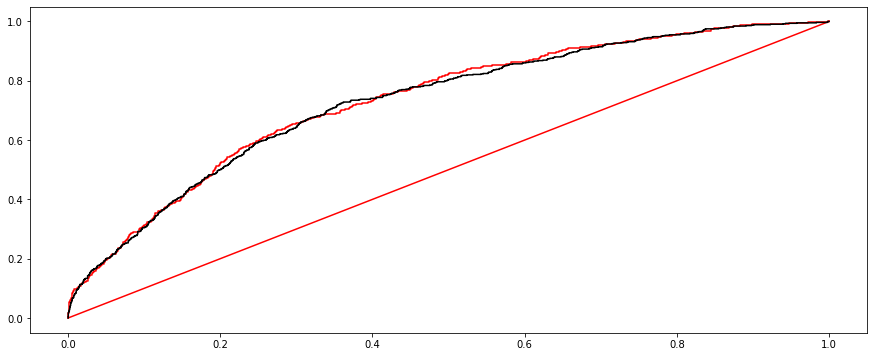

In [44]:
from sklearn.metrics import roc_curve
fpr1,tpr1,thresholds1=roc_curve(y,y_prob1)
fpr2,tpr2,thresholds2=roc_curve(y,y_prob2)
plt.figure(figsize=(15,6))
plt.plot(fpr1,tpr1,color='r')
plt.plot(fpr1,fpr1,color='r')
plt.plot(fpr2,tpr2,color='k')
plt.show()

both curves are almost the same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
y=df['CVD']
x=df['heartRate']
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
y_prob=model.predict(xc)
y_pred=y_prob.apply(lambda x:0 if x<0.5 else 1)
from sklearn.metrics import roc_auc_score
print("The AUC score is: ", roc_auc_score(y,y_pred))

Optimization terminated successfully.
         Current function value: 0.425719
         Iterations 6
The AUC score is:  0.5


AUC score of the model is 0.5. Hence the model is junk model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
from sklearn.metrics import log_loss
log_loss(y,y_prob)

0.3788306931249079

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# Full model

y1=df['CVD']
x1=df.drop('CVD',axis=1)

import statsmodels.api as sm
Xc1=sm.add_constant(x1)
model1= sm.Logit(y1,Xc1).fit()
y_prob1 = model1.predict(Xc1)
y_pred1 = y_prob1.apply(lambda x: 0 if x<0.5 else 1)
print("roc_auc_score of full model is:",roc_auc_score(y1,y_prob1))
print("\n")

# 2nd model

y2=df['CVD']
x2=df['heartRate']

import statsmodels.api as sm
Xc2=sm.add_constant(x2)
model2=sm.Logit(y2,Xc2).fit()
y_prob2 = model2.predict(Xc2)
y_pred2 = y_prob2.apply(lambda x: 0 if x<0.5 else 1)
print("roc_auc_score of 2nd model is:",roc_auc_score(y2,y_prob2))

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
roc_auc_score of full model is: 0.7321078803916014


Optimization terminated successfully.
         Current function value: 0.425719
         Iterations 6
roc_auc_score of 2nd model is: 0.5139915641257712


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:

y1=df['CVD']
x1=df.drop('CVD',axis=1)

import statsmodels.api as sm
Xc1=sm.add_constant(x1)
model1= sm.Logit(y1,Xc1).fit()
y_prob1 = model1.predict(Xc1)
y_pred1 = y_prob1.apply(lambda x: 0 if x<0.5 else 1)
print("the cross entrophy of the full model is : " ,log_loss(y1,y_prob1))

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7
the cross entrophy of the full model is :  0.3788306931249079


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [60]:
y=df['CVD']
x=df[['currentSmoker','cigsPerDay']]

import statsmodels.api as sm
Xc=sm.add_constant(x)
model= sm.Logit(y,Xc).fit()
y_prob = model.predict(Xc)
y_pred = y_prob1.apply(lambda x: 0 if x<0.5 else 1)
print(confusion_matrix(y,y_pred))


Optimization terminated successfully.
         Current function value: 0.423733
         Iterations 6
[[3576   20]
 [ 591   53]]


In [61]:
TN=3575
TP=52
FP=20
FN=591

recall=TP/(FN+TP)
precision=TP/(FP+TP)
f1_score = 2/((1/precision) + (1/recall))

print("recall :", recall)
print("precision: ",precision)
print("f1_score : ",f1_score)

recall : 0.08087091757387248
precision:  0.7222222222222222
f1_score :  0.14545454545454545


<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
y=df['CVD']
x=df.drop('CVD',axis=1)

import statsmodels.api as sm
Xc=sm.add_constant(x)
model= sm.Logit(y,Xc).fit()
y_prob = model.predict(Xc)
y_pred = y_prob.apply(lambda x: 0 if x<0.5 else 1)

from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,thresholds = roc_curve(y,y_prob)

j_scores = tpr-fpr
j_ordered = sorted(zip(j_scores,thresholds))
j_ordered[-1][1]

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


0.1627655238376047

In [63]:
y=df['CVD']
x=df.drop('CVD',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

y_test_pred = lr.predict(x_test)
y_test_prob = lr.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

j_scores = tpr-fpr
j_ordered = sorted(zip(j_scores,thresholds))
j_ordered[-1][1]

0.15666715782852783

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>